<a href="https://colab.research.google.com/github/thad75/TP_ENSEA_ELEVE/blob/main/2A/Option%20IA/Introduction_to_DL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install gdown
!gdown --id 12PZB5hWpwAyRuSWAgkaFdZdZluGf8_6Z
!gdown --id 1g1CEUs8BvSJXSDroHgjUbTa3izGp9WMO

Downloading...
From: https://drive.google.com/uc?id=12PZB5hWpwAyRuSWAgkaFdZdZluGf8_6Z
To: /content/test_signs.h5
100% 1.48M/1.48M [00:00<00:00, 116MB/s]
Downloading...
From: https://drive.google.com/uc?id=1g1CEUs8BvSJXSDroHgjUbTa3izGp9WMO
To: /content/train_signs.h5
100% 13.3M/13.3M [00:00<00:00, 36.9MB/s]


# DNNs with TensorFlow

Welcome to the Deep Learning Lab sessions. As you had a slight introduction to Deep Learning through the Course, you will now apply it through this izi pizi labs.
This lab will be done using TensorFlow from Google. 
You will learn to do the following in TensorFlow: 

- Initialize variables
- Start your own session
- Train algorithms 
- Implement a Neural Network

This part of the lab is splitted in two parts :
- Using Tensorflow
- Creating and Performing Classification using TF.

<img src="https://www.memesmonkey.com/images/memesmonkey/3f/3fd47d627866ac3f67bc4a38b0b2941c.jpeg">


# First Time Hun ?

So this might be your first time using Deep Learning for a certain task. So in this lab we will perform a certain Task : Classification. We will classify hands. Hun.

When training a DL Algorithm you need few things : 
* A Dataset
* A Model
* A Learning Algorithm
* Something more ?

So we will navigate through each of these points to train a Model to perform Hand Signs Classification.

<img src = "https://i.kym-cdn.com/photos/images/original/000/123/620/Oh-boy-here-we-go.jpg">



# I - Dataset : SIGNS


We wil use SIGNS Dataset. Let's first have some insight look on our Dataset
Load the train and test datasets


In [6]:
import h5py
import numpy as np
import tensorflow as tf
import math
import matplotlib.pyplot as plt

# TODO : load the h5 files in the correct variables
train_dataset = h5py.File('/content/train_signs.h5', "r")
test_dataset = h5py.File('/content/test_signs.h5', "r")

# TODO : print the keys of each variables. 
# Questions: Are the keys different ? 
print(train_dataset.keys())
print(test_dataset.keys())

# TODO : create x_train, y_train, x_test, y_test and convert them to array using numpy
# Questions : What is the length of each Dataset.
# Questions : What are the labels, what are our images ?

print(len(train_dataset))
x_train = np.array(train_dataset['train_set_x'][:])
y_train = np.array(train_dataset['train_set_y'][:])

x_test = np.array(test_dataset['test_set_x'][:]).reshape((1,-1))
y_test = np.array(test_dataset['test_set_y'][:]).reshape((1,-1))

# TODO : load the classes in an array. 
# Questions : How many labels should you have ? (Count your fingers)
classes = np.array(test_dataset["list_classes"][:])
print(classes)
print(x_train.shape, y_train.shape, type(x_train))

<KeysViewHDF5 ['list_classes', 'train_set_x', 'train_set_y']>
<KeysViewHDF5 ['list_classes', 'test_set_x', 'test_set_y']>
3
[0 1 2 3 4 5]
(1080, 64, 64, 3) (1080,) <class 'numpy.ndarray'>


Few questions on the Dataset: 
* How many elements do you have in your Train and Test Datasets ? Explain the shape of the Train Dataset
* What is the size of one element of the Dataset ?
* Are the images RGB images ?

Plot some images from the train Dataset with their labels along using Matplotlib

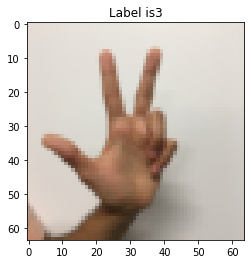

In [16]:
index = 1070
plt.title("Label is" + str(np.squeeze(y_train[ index])))
plt.imshow(x_train[index])


So now you have some understanding of the Dataset. Let's try things

II- The Model : Your Choice

We are going to guide you a lil bit for this. In fact, you can create whatever model you want. However, they might not be as effective as some other networks.
In this part, we will try Dense Layers.

<img src = "https://cdn.analyticsvidhya.com/wp-content/uploads/2020/02/ANN-Graph.gif" height=300 >


* What is the other name of a Dense Layer ?


To create this FC model, you have to understand few things :
* The input Layer will have a Fixed number of Neurons that must correspond to the image's size.
* Between the Layers, you must apply some non-linearity so that the model learns complex features.
* You have to compromise between the Shallowness or Depth of your Model. You'll understand why in the next lab.

<img src="https://miro.medium.com/max/1400/1*E4_pTJctmAofSRpZCZbv-g.jpeg" height=300>


Let's create a simple Sequential Model :    
* an Input Layer
* a Hidden Layer
* an Output Layer

(Like the picture above Andrew)

In [ ]:
# TODO : Create a Simple 3 layer model.
# Question : What is the input shape ?
# Question : What is the output shape ?
# Question : What non linearity must we add ?

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

III- The Loss 

Now we need something to tell our model if it does well or no. Let's say your model predicts something. We need to compute how far the prediction is compared to the real label. 
We will use the cross entropy.

IV - The Optimizer

So at the end of the Model, we can compute a loss. We need to back-propagate the loss to all the layers so that it sees and understands the end result of a prediction. 

You have plenty of optimizers available, the simplest is Gradient Descent.

V - The Compilation

Now that we have all we need, we have to compile the model with all the preceding stuff. 

That's where TensorFlow is cool. It has a compile method that compiles everything for you.

VI- The Training 

When you train, you become fit. In Deep Learning, we fit a distribution of Data to the model so that it learns a specific task.

Again, TensorFlow has a great method that fits data for you.

In [ ]:
model.fit(x_train, y_train, epochs=5)


We decide to teach our computers to decipher sign language. Here are the datasets we will use:

- **Training set**: 1080 pictures (64 by 64 pixels) of signs representing numbers from 0 to 5 (180 pictures per number).
- **Test set**: 120 pictures (64 by 64 pixels) of signs representing numbers from 0 to 5 (20 pictures per number).

VII- The Evalutation